# Import the NOTES.md files and turn them into charts/graphs

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Enlargen plots
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
dirs = {
    'baseline': ['checkpoints', 'save', 'run21', 'NOTES.md'],
    'fgsm-L1': ['checkpoints', 'save', 'run20', 'NOTES.md'],
    'fgsm-Inf': ['checkpoints', 'save', 'run19', 'NOTES.md'],
    'ugan': ['checkpoints', 'save', 'run22', 'NOTES.md'],
}

dfs = {}

In [4]:
for key in dirs:
    print('pd for {}'.format(key))
    
    cols = ['G accuracy', 'BB accuracy', 'D accuracy', 'BB accuracy (on G)']
    ids = []
    rows = []
    
    found = False
    with open(os.path.join(*dirs[key])) as f:
        for line in f:
            if not found:
                if '|' in line:
                    found = True
                    ## read columns
                    #line = line.replace(' ', '')
                    #line = line.replace('\n', '')
                    #cols = line.split('|')[1:-1]
            else:
                if ':' in line:
                    continue
                if '|' not in line:
                    break
                else:
                    line = line.replace(' ', '')
                    line = line.replace('\n', '')
                    line = line.replace('%', '')
                    split = line.split('|')[1:-1]
                    ids.append(int(split[0]))
                    rows.append([None if x is '' else float(x) for x in split[1:]])
                    
    
                    
    # manipulate to prep for df
    data = {}
    for i, col in enumerate(cols):
        data[col] = []
        for r in rows:
            data[col].append(r[i])
    
    df = pd.DataFrame(data, index=ids)
    df.index.name = "It"
    dfs[key] = df

pd for baseline
pd for fgsm-L1
pd for fgsm-Inf
pd for ugan


### Make LaTeX version of df

In [5]:
for key in dfs:
    print('~'*50)
    print('LaTeX for {}'.format(key))
    print()
    print(dfs[key].to_latex(na_rep=''))
    print()
    print()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LaTeX for baseline

\begin{tabular}{lrrrr}
\toprule
{} &  G accuracy &  BB accuracy &  D accuracy &  BB accuracy (on G) \\
It &             &              &             &                     \\
\midrule
0  &             &              &        34.8 &                     \\
1  &        78.0 &              &        36.8 &                76.0 \\
2  &        80.0 &        53.00 &        55.5 &                78.0 \\
3  &        86.0 &              &        56.0 &                67.0 \\
4  &        86.0 &        66.89 &        61.7 &                64.0 \\
5  &        79.0 &              &        64.6 &                76.0 \\
6  &        96.0 &        77.61 &        61.6 &                86.0 \\
7  &        97.0 &              &        56.7 &                96.0 \\
8  &        96.0 &        81.21 &        58.6 &                91.0 \\
9  &        96.0 &              &        58.2 &                93.0 \\
10 &        96.0 &        82.97 &   

### Make graphs

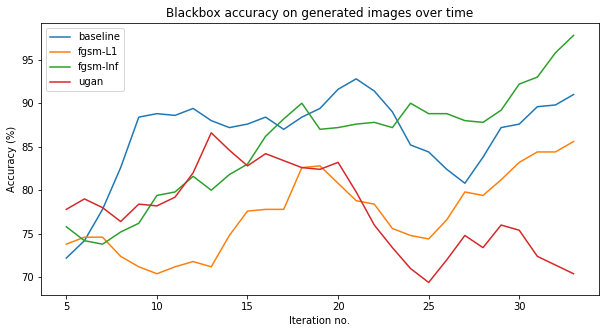

In [9]:
# Plot BB accuracy on G over iteration
plt.figure()
plt.title('Blackbox accuracy on generated images over time')

legend = []
for key in dfs:
    rolling_mean = dfs[key]['BB accuracy (on G)'].rolling(window=5).mean()
    plt.plot(dfs[key].index, rolling_mean)
#     plt.plot(dfs[key].index, dfs[key]['BB accuracy (on G)'].values)
    legend.append(key)
    
plt.ylabel('Accuracy (%)')
plt.xlabel('Iteration no.')
plt.legend(legend)
plt.show()

In [7]:
# # Plot BB accuracy on G over iteration
# plt.figure()
# plt.title('BB accuracy on Test Set over time')

# legend = []
# for key in dfs:
#     non_null_ids = [i for i in dfs[key].index if dfs[key]['BB accuracy'].isnull()[i] == False]
#     non_null_values = [dfs[key]['BB accuracy'][i] for i in dfs[key].index if dfs[key]['BB accuracy'].isnull()[i] == False]
#     plt.plot(non_null_ids, non_null_values)
#     legend.append(key)
    
# plt.ylabel('Accuracy (%)')
# plt.xlabel('Iteration no.')
# plt.legend(legend)
# plt.show()

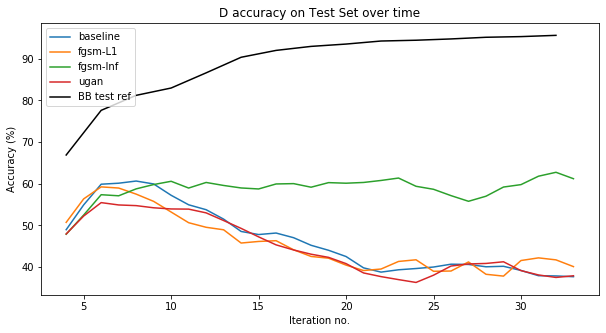

In [8]:
# Plot BB accuracy on G over iteration
plt.figure()
plt.title('D accuracy on Test Set over time')

legend = []
for key in dfs:
    rolling_mean = dfs[key]['D accuracy'].rolling(window=5).mean()
    plt.plot(dfs[key].index, rolling_mean)
    #plt.plot(dfs[key].index, dfs[key]['D accuracy'].values)
    legend.append(key)
    
# plot BB acc for reference
key = 'baseline'
non_null_ids = [i for i in dfs[key].index if dfs[key]['BB accuracy'].isnull()[i] == False and i >= 4]
non_null_values = [dfs[key]['BB accuracy'][i] for i in dfs[key].index if dfs[key]['BB accuracy'].isnull()[i] == False and i >= 4]
plt.plot(non_null_ids, non_null_values, 'k')
legend.append('BB test ref')
    
plt.ylabel('Accuracy (%)')
plt.xlabel('Iteration no.')
plt.legend(legend)
plt.show()